In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd

from ram import config

import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.run_aggregator import RunAggregator
from ram.analysis.combo_search import CombinationSearch
from ram.analysis.statistics import get_stats
from ram.utils.time_funcs import convert_date_array

In [2]:
print(RunManager.get_run_names('LongPeadStrategy'))

         Run                                        Description
0   run_0018                               sector 30 new params
1   run_0020                       sector 30 with aasims params
2   run_0021  Sector 30, lowered price to 5, though no filte...
3   run_0022                     test run with predictive model
4   run_0023                            test run with more data
5   run_0024                         more data updated features
6   run_0025     same as run 0024 but with ExtraTressClassifier
7   run_0026          same as above but with LogisticRegression
8   run_0027  Voting with Logistic Classifier, Random Forest...
9   run_0028                                    AAdaBoost model
10  run_0029                                           AdaBoost
11  run_0030                                           adaboost
12  run_0031  bagging for logistic, voting method same as ru...
13  run_0036                                              ridge
14  run_0037                        remo

## Analysis of a single run

In [17]:
rm1 = RunManager('LongPeadStrategy', 'run_0051')
rm1.import_return_frame()
rm1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,anchor_init_offset,3,16,0.855534,0.129306,-999.0
1,anchor_window,10,16,0.855534,0.129306,-999.0
2,blackout_offset1,-1,16,0.855534,0.129306,-999.0
3,blackout_offset2,4,16,0.855534,0.129306,-999.0
4,logistic_spread,0.1,4,0.861156,0.128181,-999.0
5,logistic_spread,0.5,4,0.859999,0.128434,-999.0
6,logistic_spread,1,4,0.856516,0.129166,-999.0
7,logistic_spread,2,4,0.844464,0.131441,-999.0
8,open_execution,False,8,0.951227,0.144273,-999.0
9,open_execution,True,8,0.759840,0.114338,-999.0


In [18]:
# Sharpe Ratios
rm1.returns.mean() * 252 / rm1.returns.std() / np.sqrt(252)

0     1.796891
1     1.800795
2     1.812236
3     1.847243
4     2.258334
5     2.262163
6     2.273331
7     2.307977
8     1.798771
9     1.802670
10    1.813786
11    1.848056
12    2.285235
13    2.289682
14    2.302465
15    2.342950
dtype: float64

## Compare runs

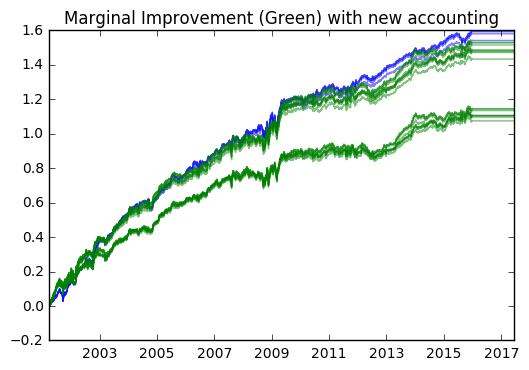

In [30]:
runs = ['run_0043', 'run_0051']

colors = ['b', 'g']

for c, run in zip(colors, runs):
    rm1 = RunManager('LongPeadStrategy', run, 2000)
    rm1.import_return_frame()
    plt.plot(rm1.returns.cumsum(), c, alpha=.5)

plt.title('Marginal Improvement (Green) with new accounting')
plt.show()

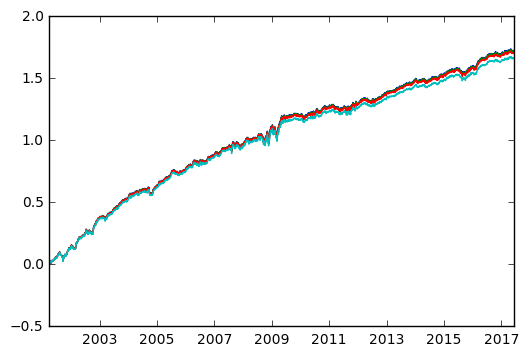

In [66]:
rm1 = RunManager('LongPeadStrategy', 'run_0043', 2000)
rm1.import_return_frame()

plt.figure()
plt.plot(rm1.returns.cumsum())

In [67]:
df = rm1.returns.iloc[:, [0]].reset_index()
df.columns = ['Date', 'Return']
df['TIndex'] = ['{}{}'.format(x.year, (x.month-1)/3+1) for x in df.Date]
df['Year'] = [x.year for x in df.Date]


In [68]:
df.groupby('Year')['Return'].sum()

Year
2001    0.137474
2002    0.241964
2003    0.159820
2004    0.098354
2005    0.126581
2006    0.120306
2007    0.086646
2008    0.125213
2009    0.108556
2010    0.071059
2011    0.024444
2012    0.084143
2013    0.107459
2014    0.046340
2015    0.057604
2016    0.105709
2017    0.026034
Name: Return, dtype: float64